### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [61]:
#import files and put in list
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
df_names <- list(ny, chi, wash)

In [35]:
#view top rows of data and see the dimensions of the data
#taken from https://stackoverflow.com/questions/32618369/is-there-a-way-to-view-a-list
#On 19th April 2022
#User: giraffehere
printList <- function(list) {

  for (item in 1:length(list)) {

    print(head(list[[item]]))

  }
}
printList(df_names)

        X          Start.Time            End.Time Trip.Duration
1 5688089 2017-06-11 14:55:05 2017-06-11 15:08:21           795
2 4096714 2017-05-11 15:30:11 2017-05-11 15:41:43           692
3 2173887 2017-03-29 13:26:26 2017-03-29 13:48:31          1325
4 3945638 2017-05-08 19:47:18 2017-05-08 19:59:01           703
5 6208972 2017-06-21 07:49:16 2017-06-21 07:54:46           329
6 1285652 2017-02-22 18:55:24 2017-02-22 19:12:03           998
            Start.Station            End.Station  User.Type Gender Birth.Year
1 Suffolk St & Stanton St W Broadway & Spring St Subscriber   Male       1998
2 Lexington Ave & E 63 St        1 Ave & E 78 St Subscriber   Male       1981
3       1 Pl & Clinton St   Henry St & Degraw St Subscriber   Male       1987
4   Barrow St & Hudson St        W 20 St & 8 Ave Subscriber Female       1986
5         1 Ave & E 44 St        E 53 St & 3 Ave Subscriber   Male       1992
6     State St & Smith St    Bond St & Fulton St Subscriber   Male       1986
      

### Question 1


**What is the average travel time for different genders in New York?**

In [21]:
#Change rows with blank gender to NA
ny_gender <- ny
ny_gender$Gender[ny_gender$Gender == ""] <- NA
sum(is.na(ny_gender$Gender))

# Summary stats for time/New York data; and summary of same by gender.
summary(ny_gender$Trip.Duration)
tapply(ny_gender$Trip.Duration, ny_gender$Gender, summary)

[1] 5410

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 

[[1]]
NULL

$Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     400     644     876    1068   77918 

$Male
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     61.0     340.0     551.0     768.9     918.0 1088634.0 


Warning message:
“Removed 663 rows containing non-finite values (stat_boxplot).”

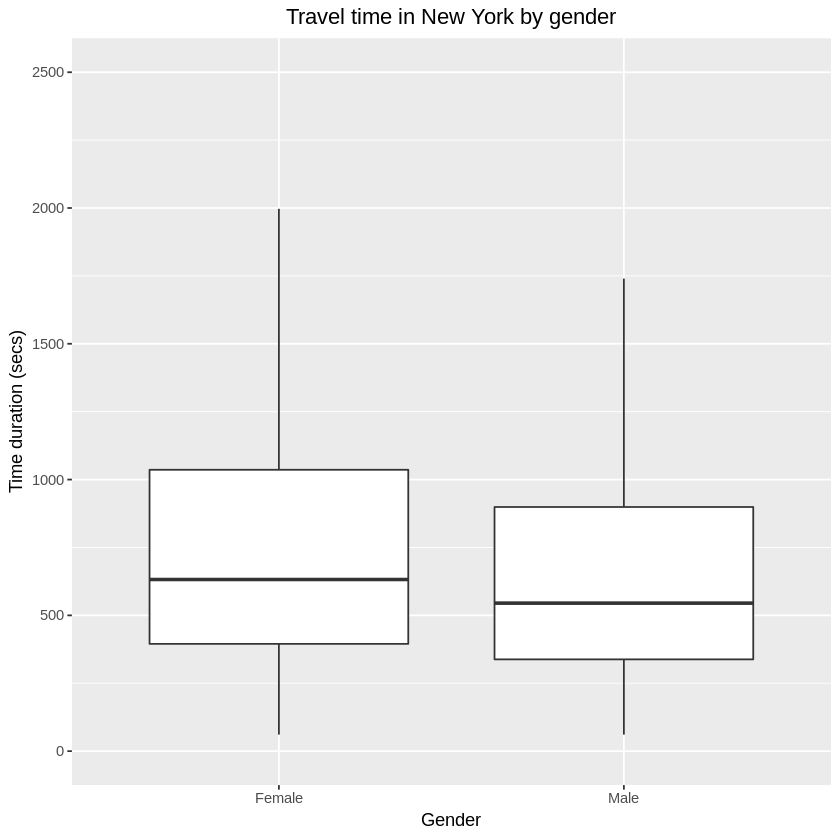

In [22]:
# Box plots by gender and time duration. Removing missing gender data and removing outliers from box plots. 
# Y-scale limited to 2500 seconds and title changed
# Title added and centred

library(ggplot2)

ggplot(data = subset(ny_gender, !is.na(Gender)), aes(x = Gender, y = Trip.Duration)) +
    geom_boxplot(outlier.shape = NA) +
    scale_y_continuous(limits = c(0, 2500)) +
    ylab("Time duration (secs)") +
    ggtitle("Travel time in New York by gender") +
    theme(plot.title = element_text(hjust = 0.5))

** Looking at the summary, there seems to be quite a few outliers. Therefore, I removed them from the box plot. The median (644 and 551) and the mean (876 and 769) were higher for female riders in New York than male riders respectively.

### Question 2

**What is the most common day of week for Bikeshare rentals in Washington?**

In [69]:
#Add weekday values to tables
wash_day <- wash
wash_day$weekday <- weekdays(as.Date(wash_day$Start.Time))

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,weekday
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,Wednesday
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Saturday
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Tuesday
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Sunday
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Saturday
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Sunday


In [70]:
library(dplyr)

# Order days in week so they are in weekday order
weekday_order <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday",
                                           "Friday", "Saturday")
wash_day$weekday <- ordered(wash_day$weekday, levels = weekday_order)

#count how many rentals occur per weekday - these numbers are VERY different from the counts on the downloaded datasets
wash_days <- wash_day %>% count(weekday)

wash_days

weekday,n
Sunday,11566
Monday,11721
Tuesday,13288
Wednesday,14212
Thursday,13204
Friday,12926
Saturday,12133
NA,1


[1] 1

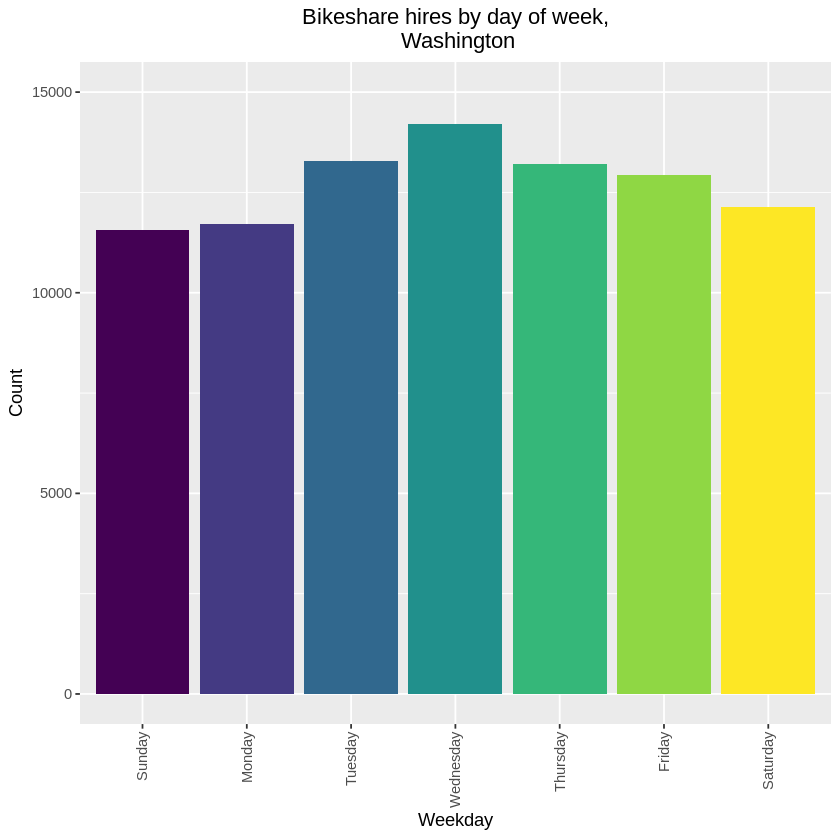

In [71]:
#Change rows with blank day to NA 
wash_day$weekday[wash_day$weekday == ""] <- NA
sum(is.na(wash_day$weekday))

# Column graph count by day. Removed missing day data
# Y-scale limited to 15,000 and labels added to title, x-axis, and y-axis
#Titled centred and split across two lines
library(ggplot2)
p1 <- ggplot(data= subset(wash_day, !is.na(weekday)), aes(x = weekday, fill=weekday)) + geom_bar() + ylim(0, 15000) + 
  labs(title="Bikeshare hires by day of week,\n Washington", x="Weekday", y = "Count") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
        legend.position="none")

p1

**Summary of your question 2 results goes here.**
After downloading the files and creating the code on my machine, the counts are vastly different than when I run it here. When looking at the Chicago data, there are 8630 rows within this workspace but the file for download contains 300,000 rows. My comments below are using the data for download on my machine.

           New York   Chicago    Washington
Weekday     Count
Sunday      36151     38775       39576
Monday      41923     44881       39930
Tuesday     43752     45912       44519
Wednesday   52087     42530       48156
Thursday    47497     43095       43946
Friday      44664     43922       43280
Saturday    33926     40885       40593

The most common day to hire a bike for both New York and Washington is Wednesday, and Tuesday for Chicago. The weekends have the lowest counts of bike hires.

### Question 3

**What are the counts of each user type?**

In [53]:
library(dplyr)

#Count the different user types per city
df_names <- list(ny$User.Type, chi$User.Type, wash$User.Type)
user_count <- lapply(df_names, function(x) summary(x))
user_count

#Each city has a user type '1', which is blank. Change blank to NA
ny_user <- ny
chi_user <- chi
wash_user <- wash

                     
df_user <- list(ny_user$User.Type, chi_user$User.Type, wash_user$User.Type)
na_change <- lapply(df_user, function(x) replace(x, x ==0, NA))
sum(is.na(ny_user$User.Type))
summary(ny_user$User.Type)

[[1]]
             Customer Subscriber 
       119       5558      49093 

[[2]]
             Customer Subscriber 
         1       1746       6883 

[[3]]
             Customer Subscriber 
         1      23450      65600

[1] 0

Customer Subscriber 
       119       5558      49093

In [83]:
library(dplyr)

#Count the different user types per city
df_names <- list(ny$User.Type, chi$User.Type, wash$User.Type)
user_count <- lapply(df_names, function(x) summary(x))
user_count

#Each city has a user type '1', which is blank. Change blank to NA
ny_user <- ny
chi_user <- chi
wash_user <- wash
                     
ny_user$User.Type[ny_user$User.Type == ""] <- NA
sum(is.na(ny_user$User.Type))

chi_user$User.Type[chi_user$User.Type == ""] <- NA
sum(is.na(chi_user$User.Type))

wash_user$User.Type[wash_user$User.Type == ""] <- NA
sum(is.na(wash_user$User.Type))
                     
#add three datasets into one, removing variables gender and birth year from NY and CHI.
ny_user$city <- "New York"  
ny_user <- subset(ny_user, select=-c(Gender, Birth.Year))
chi_user$city <- "Chicago"
chi_user <- subset(chi_user, select=-c(Gender, Birth.Year))
wash_user$city <- "Washington"
                                     
all_cities <- rbind(ny_user, chi_user, wash_user)


[[1]]
             Customer Subscriber 
       119       5558      49093 

[[2]]
             Customer Subscriber 
         1       1746       6883 

[[3]]
             Customer Subscriber 
         1      23450      65600

[1] 119

[1] 1

[1] 1

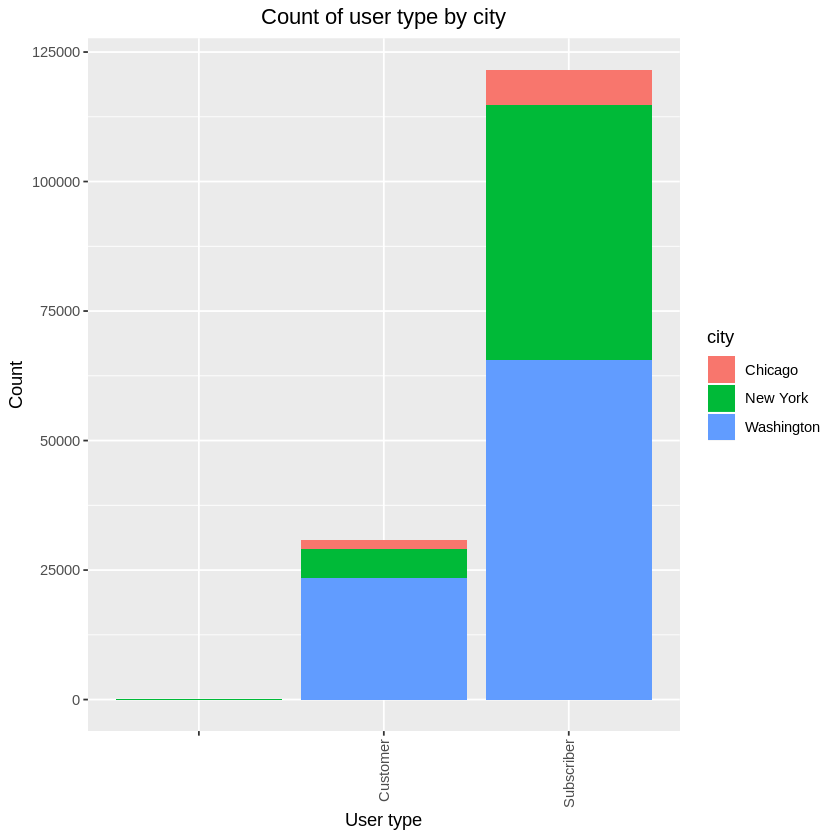

In [82]:
# Stacked column graphs of user type by city
library(ggplot2)

p2 <- ggplot(data=subset(all_cities, !is.na(User.Type)), aes(x = User.Type, fill=city)) + geom_bar() + 
  labs(title="Count of user type by city", x="User type", y = "Count") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

p2

**Summary of your question 3 results goes here.**
Washington has the greatest count of users, both customers and subscribers with Chicago having the fewest. All three cities have a greater number of subscribers hiring bikes than customers.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')